In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_return = pd.read_csv("/Users/adlnzmnzr/Downloads/ecommerce_returns_synthetic_data.csv")

In [3]:
df_return.head(5)

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [4]:
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       5052 non-null   object 
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     5052 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    5052 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [5]:
df_return.describe()

,Product_Price,Order_Quantity,Days_to_Return,User_Age,Discount_Applied
count,10000.000000,10000.000000,5052.000000,10000.000000,10000.000000
mean,252.369307,3.006100,1.453682,44.195000,24.992162
std,142.883865,1.406791,297.983208,15.311983,14.363396
min,5.010000,1.000000,-719.000000,18.000000,0.000000
25%,128.650000,2.000000,-214.000000,31.000000,12.752500
50%,250.445000,3.000000,1.000000,44.000000,24.840000
75%,377.837500,4.000000,218.000000,57.000000,37.605000
max,499.890000,5.000000,726.000000,70.000000,50.000000


In [6]:
df_return.isna().sum()

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64

In [7]:
def get_return_quantity(row) :
    return row["Order_Quantity"] if pd.notna(row["Return_Date"]) else np.nan

df_return["Return_Quantity"] = df_return.apply(get_return_quantity, axis = 1)

In [8]:
df_return[["Order_Date", "Return_Date"]] = df_return[["Order_Date", "Return_Date"]].apply(pd.to_datetime, errors = "coerce")
df_return[["Return_Quantity", "Order_Quantity", "Days_to_Return"]] = df_return[["Return_Quantity", "Order_Quantity", "Days_to_Return"]].astype("Int64")


In [9]:
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          10000 non-null  object        
 1   Product_ID        10000 non-null  object        
 2   User_ID           10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Return_Date       5052 non-null   datetime64[ns]
 5   Product_Category  10000 non-null  object        
 6   Product_Price     10000 non-null  float64       
 7   Order_Quantity    10000 non-null  Int64         
 8   Return_Reason     5052 non-null   object        
 9   Return_Status     10000 non-null  object        
 10  Days_to_Return    5052 non-null   Int64         
 11  User_Age          10000 non-null  int64         
 12  User_Gender       10000 non-null  object        
 13  User_Location     10000 non-null  object        
 14  Payment_Method    10000

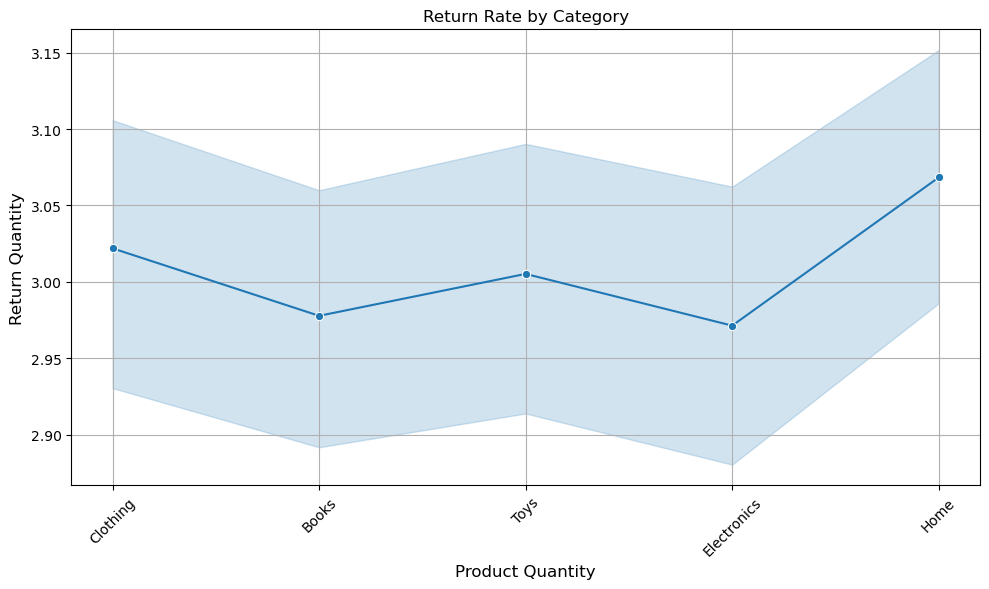

In [10]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "Product_Category", y = "Return_Quantity", data = df_return, marker = "o")
plt.xlabel("Product Quantity", fontsize = 12)
plt.ylabel("Return Quantity", fontsize  = 12)
plt.title("Return Rate by Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/y3/c7jgmxjj369gfx84rl2ybgnr0000gp/T/ipykernel_1292/3139997693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_return, x = "Shipping_Method", y = "Return_Quantity", palette = "viridis")


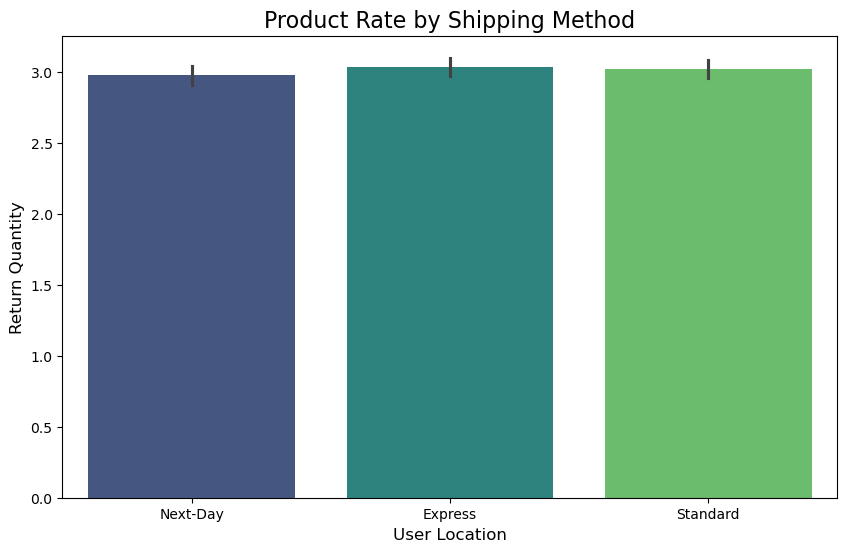

In [11]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_return, x = "Shipping_Method", y = "Return_Quantity", palette = "viridis")
plt.xlabel("User Location", fontsize = 12)
plt.ylabel("Return Quantity", fontsize = 12)
plt.title("Product Rate by Shipping Method", fontsize = 16)
plt.show()

In [12]:
df_return["User_Location"].nunique()

100

In [13]:
df_return["User_Location"].value_counts()

User_Location
City81    126
City36    122
City3     117
City22    116
City28    115
         ... 
City9      86
City95     83
City56     82
City5      82
City6      76
Name: count, Length: 100, dtype: int64

In [15]:
df_return['Return_Rate'] = df_return['Return_Quantity']/df_return['Order_Quantity']

In [16]:
df_return['Is_Returned'] = df_return['Return_Date'].notna().astype(int)

In [18]:
df_return['Discount_Ratio'] = df_return['Discount_Applied']/df_return['Product_Price'] * df_return['Order_Quantity']

In [21]:
df_return['Product_Category'] = pd.cut(df_return['Product_Price'], bins = [0, 100, 300, 500, 1000], labels = ['Low', 'Medium', 'High', 'Premium'])


In [22]:
category_return_rate = df_return.groupby('Product_Category')['Is_Returned'].mean()
shipping_return_rate = df_return.groupby('Shipping_Method')['Is_Returned'].mean()

/var/folders/y3/c7jgmxjj369gfx84rl2ybgnr0000gp/T/ipykernel_1292/3055005292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_return_rate = df_return.groupby('Product_Category')['Is_Returned'].mean()


In [23]:
df_return.head(5)

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,...,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Return_Quantity,Return_Rate,Is_Returned,Discount_Ratio
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,High,411.59,3,Changed mind,Returned,...,58,Male,City54,Debit Card,Next-Day,45.27,3,1.0,1,0.329964
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Medium,288.88,3,Wrong item,Returned,...,68,Female,City85,Credit Card,Express,47.79,3,1.0,1,0.496296
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaT,High,390.03,5,NaN,Not Returned,...,22,Female,City30,Debit Card,Next-Day,26.64,<NA>,<NA>,0,0.341512
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaT,High,401.09,3,NaN,Not Returned,...,40,Male,City95,PayPal,Next-Day,15.37,<NA>,<NA>,0,0.114962
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaT,Medium,110.09,4,NaN,Not Returned,...,34,Female,City80,Gift Card,Standard,16.37,<NA>,<NA>,0,0.594786


In [32]:
import sqlite3
from IPython.display import FileLink

sql_db = 'return.db'
conn = sqlite3.connect(sql_path)

df_return.to_sql('ecommerce_return', conn, if_exists = 'replace', index = False)

conn = sqlite3.connect('/Users/adlnzmnzr/Downloads/return.db')

sql_dump_path = 'ecommerce_return_dump.sql'
with open(sql_dump_path, 'w') as f:
    for line in conn.iterdump():
        f.write(f'{line}\n')

conn.close()

FileLink(sql_dump_path)

/Users/adlnzmnzr/Applications/anaconda3/project/intern/ecommerce_return_dump.sql

In [43]:
from IPython.display import HTML

filename = 'ecommerce_return.csv'
df_return.to_csv(filename, index=False)

HTML(f'<a href="{filename}" download> Click here to download people.csv</a>')